In [1]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.10.0


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv(r"C:\Users\Jaiprakash\OneDrive\Desktop\TestProject\Artificial_Neural_Network\Churn_Modelling.csv")

In [6]:
df = dataset.copy()
df = df.drop(["Surname", "RowNumber", "CustomerId"], axis=1)

In [7]:
geography = pd.get_dummies(df["Geography"], prefix="Geography", drop_first=True)

In [8]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [9]:
df = pd.concat([df, geography], axis=1)

In [10]:
df = df.drop("Geography", axis="columns")

In [11]:
#Define Independent and Dependent features
X = df.drop(["Exited"], axis=1)
Y = df["Exited"]

In [12]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Part 2 - Now let's make the ANN!

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

### Important Terms:
- Sequential --> For Forward & Backward Propagation
- Dense --> For creating Neurons(Input Layer, Output Layer, Hidden Layer etc)
- Activation --> Can be used in Hidden/Output Layers

In [17]:
# Initialising the ANN
classifier = Sequential() 

In [18]:
# Adding the input layer 
classifier.add(Dense(units=11,activation='relu'))


In [19]:
# Adding the first hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [20]:
# Adding the Second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [21]:
# Adding the output layer
classifier.add(Dense(units=1,activation='relu'))

In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.0001, patience=20, 
                                                  verbose=1, mode="auto", baseline=None, restore_best_weights=False )

In [24]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 1.6187 - accuracy: 0.7815 - val_loss: 0.6342 - val_accuracy: 0.7906
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.8524 - accuracy: 0.7761 - val_loss: 0.5162 - val_accuracy: 0.7978
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.7869 - val_loss: 0.4812 - val_accuracy: 0.7978
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.5742 - accuracy: 0.7968 - val_loss: 0.4802 - val_accuracy: 0.7993
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.5447 - accuracy: 0.8013 - val_loss: 0.4799 - val_accuracy: 0.7989
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.5166 - accuracy: 0.8022 - val_loss: 0.4785 - val_accuracy: 0.7974
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4945 - accuracy: 0.8005 - val_loss: 0.4752 - val_accuracy:

In [25]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


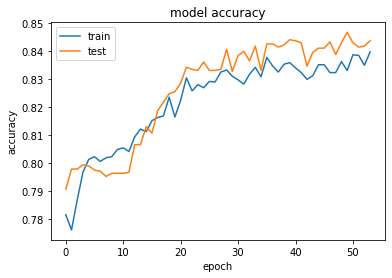

In [26]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

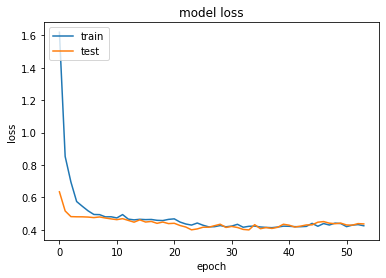

In [27]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1567,   28],
       [ 243,  162]], dtype=int64)

In [30]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score, roc_auc_score
accuracy_score=accuracy_score(y_pred,y_test) * 100
accuracy_score

86.45

In [31]:
auroc_score = roc_auc_score(y_pred, y_test) * 100
print("Accuracy score: {:.2f}%, Auroc-score: {:.2f}%".format(accuracy_score, auroc_score))

Accuracy score: 86.45%, Auroc-score: 85.92%
